In [11]:
!pip install spacy datasets matplotlib
!python -m spacy download es_core_news_md


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
      --------------------------------------- 0.8/42.3 MB 3.0 MB/s eta 0:00:14
     -- ------------------------------------- 2.9/42.3 MB 7.0 MB/s eta 0:00:06
     ---- ----------------------------------- 4.7/42.3 MB 8.4 MB/s eta 0:00:05
     -------- ------------------------------- 8.7/42.3 MB 10.5 MB/s eta 0:00:04
     ------------ -------------------------- 13.4/42.3 MB 13.1 MB/s eta 0:00:03
     ---------------- ---------------------- 17.8/42.3 MB 14.4 MB/s eta 0:00:02
     ------------------ -------------------- 20.4/42.3 MB 14.2 MB/s eta 0:00:02
     -------------------- ------------------ 22.5/42.3 MB 13.8 MB/s eta 0:00:02
     ---------------------- ---------------- 24.1/42.3 MB 13.3 MB/s eta 0:00:02
     ------------------------- ------------- 27.8/42.3 MB 13.6 MB/s eta 0:00:02
     ------------------------------ -------- 33.3/42.3 MB 

## Práctica 2: Propiedades estadísticas de la lengua

### Fecha de entrega: 2 de Marzo de 2025 11:59pm

1. Verificar si la ley de Zipf se cumple en un lenguaje artificial creado por ustedes.
    - *Ejemplo:* Un "lenguaje artificial" podría ser simplemente un texto donde las secuencias de caracteres fueron generadas aleatoriamente.
2. Explorar `datasets` del sitio [Hugging Face](https://huggingface.co/datasets) y elegir documentos de diferentes dominios en Español (al menos 3). Realizar reconocimiento de entidades nombradas (NER).
    - Pueden utilizar subconjuntos de los datasets encontrados
    - Mostrar resultados del reconocimiento
    - Una distribución de frecuencias de las etiquetas más comunes en cada dominio
    - Comentarios generales del desempeño observado.

*Sugerencias: Spacy, CoreNLP (puede ser cualquier otra herramienta)*

## 1. Ley de Zipf

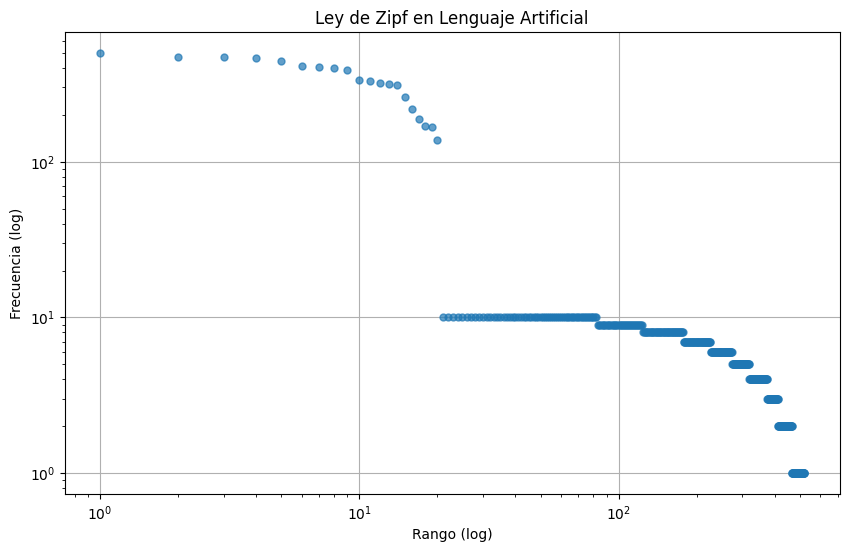

In [10]:
import random
import string
from collections import Counter
import matplotlib.pyplot as plt

# --- Configuración ---
num_total_palabras = 10000  # Total de palabras en el texto
num_palabras_comunes = 20   # Número de palabras frecuentes (ej: "el", "la", "de")
num_palabras_raras = 500     # Número de palabras raras (aparecerán poco)

# --- Generar palabras ---
# 1. Palabras "comunes" (aparecerán mucho)
palabras_comunes = [''.join(random.choices(string.ascii_lowercase, k=3)) for _ in range(num_palabras_comunes)]

# 2. Palabras "raras" (aparecerán poco)
palabras_raras = [''.join(random.choices(string.ascii_lowercase, k=5)) for _ in range(num_palabras_raras)]

# --- Asignar frecuencias ---
# - Las palabras comunes aparecerán entre 100 y 500 veces.
# - Las palabras raras aparecerán entre 1 y 10 veces.
texto_artificial = []

# Añadir palabras comunes (muchas repeticiones)
for palabra in palabras_comunes:
    frecuencia = random.randint(100, 500)
    texto_artificial.extend([palabra] * frecuencia)

# Añadir palabras raras (pocas repeticiones)
for palabra in palabras_raras:
    frecuencia = random.randint(1, 10)
    texto_artificial.extend([palabra] * frecuencia)

# Mezclar todas las palabras para que no estén ordenadas
random.shuffle(texto_artificial)

# Recortar a num_total_palabras (por si nos pasamos)
texto_artificial = texto_artificial[:num_total_palabras]

# --- Calcular frecuencias ---
word_counts = Counter(texto_artificial)
sorted_counts = sorted(word_counts.values(), reverse=True)
ranks = range(1, len(sorted_counts) + 1)

# --- Graficar (log-log) ---
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_counts, 'o', markersize=5, alpha=0.7)
plt.xlabel('Rango (log)')
plt.ylabel('Frecuencia (log)')
plt.title('Ley de Zipf en Lenguaje Artificial')
plt.grid(True)
plt.show()

### Análisis

El lenguaje artificial generado muestra un comportamiento parcialmente similar a la Ley de Zipf, especialmente en los rangos altos (palabras más frecuentes). No obstante, la presencia artificial y uniforme de muchas palabras raras altera la distribución esperada, lo que demuestra que la ley de Zipf no se cumple completamente en un lenguaje no natural.

## 2. NER

In [12]:
from datasets import load_dataset

# Dataset 1: Jurídico Mexicano
dataset_juridico = load_dataset("Danielbrdz/Barcenas-Juridico-Mexicano-Dataset", split="train[:500]")  # Subconjunto para prueba

# Dataset 2: Narrativas (LAMBADA en español)
dataset_lambada = load_dataset("EleutherAI/lambada_openai", "es", split="test[:500]")

# Dataset 3: Quran en español
dataset_quran = load_dataset("nazimali/quran", split="train[:500]")

README.md:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

c:\Users\Alejandro Torres\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Alejandro Torres\.cache\huggingface\hub\datasets--Danielbrdz--Barcenas-Juridico-Mexicano-Dataset. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Barcenas-Juridico-Mexicano.parquet:   0%|          | 0.00/3.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/22789 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/29.5k [00:00<?, ?B/s]

c:\Users\Alejandro Torres\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Alejandro Torres\.cache\huggingface\hub\datasets--nazimali--quran. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Resolving data files:   0%|          | 0/172 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/172 [00:00<?, ?it/s]

train-00004-of-00172.parquet:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

train-00001-of-00172.parquet:   0%|          | 0.00/935k [00:00<?, ?B/s]

train-00010-of-00172.parquet:   0%|          | 0.00/933k [00:00<?, ?B/s]

train-00007-of-00172.parquet:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

train-00002-of-00172.parquet:   0%|          | 0.00/1.13M [00:00<?, ?B/s]

train-00014-of-00172.parquet:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

train-00005-of-00172.parquet:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

train-00000-of-00172.parquet:   0%|          | 0.00/816k [00:00<?, ?B/s]

train-00003-of-00172.parquet:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

train-00006-of-00172.parquet:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

train-00008-of-00172.parquet:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

train-00012-of-00172.parquet:   0%|          | 0.00/1.17M [00:00<?, ?B/s]

train-00011-of-00172.parquet:   0%|          | 0.00/880k [00:00<?, ?B/s]

train-00017-of-00172.parquet:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

train-00019-of-00172.parquet:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

train-00020-of-00172.parquet:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

train-00018-of-00172.parquet:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

train-00021-of-00172.parquet:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

train-00023-of-00172.parquet:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

train-00026-of-00172.parquet:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

train-00028-of-00172.parquet:   0%|          | 0.00/779k [00:00<?, ?B/s]

train-00016-of-00172.parquet:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

train-00029-of-00172.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

train-00015-of-00172.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

train-00031-of-00172.parquet:   0%|          | 0.00/865k [00:00<?, ?B/s]

train-00030-of-00172.parquet:   0%|          | 0.00/1.15M [00:00<?, ?B/s]

train-00032-of-00172.parquet:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

train-00033-of-00172.parquet:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

train-00027-of-00172.parquet:   0%|          | 0.00/963k [00:00<?, ?B/s]

train-00022-of-00172.parquet:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

train-00035-of-00172.parquet:   0%|          | 0.00/1.09M [00:00<?, ?B/s]

train-00037-of-00172.parquet:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

train-00036-of-00172.parquet:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

train-00038-of-00172.parquet:   0%|          | 0.00/868k [00:00<?, ?B/s]

train-00024-of-00172.parquet:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

train-00040-of-00172.parquet:   0%|          | 0.00/968k [00:00<?, ?B/s]

train-00039-of-00172.parquet:   0%|          | 0.00/887k [00:00<?, ?B/s]

train-00043-of-00172.parquet:   0%|          | 0.00/897k [00:00<?, ?B/s]

train-00042-of-00172.parquet:   0%|          | 0.00/868k [00:00<?, ?B/s]

train-00044-of-00172.parquet:   0%|          | 0.00/969k [00:00<?, ?B/s]

train-00041-of-00172.parquet:   0%|          | 0.00/902k [00:00<?, ?B/s]

train-00045-of-00172.parquet:   0%|          | 0.00/872k [00:00<?, ?B/s]

train-00046-of-00172.parquet:   0%|          | 0.00/1.09M [00:00<?, ?B/s]

train-00047-of-00172.parquet:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

train-00049-of-00172.parquet:   0%|          | 0.00/494k [00:00<?, ?B/s]

train-00050-of-00172.parquet:   0%|          | 0.00/452k [00:00<?, ?B/s]

train-00052-of-00172.parquet:   0%|          | 0.00/813k [00:00<?, ?B/s]

train-00051-of-00172.parquet:   0%|          | 0.00/616k [00:00<?, ?B/s]

train-00055-of-00172.parquet:   0%|          | 0.00/869k [00:00<?, ?B/s]

train-00056-of-00172.parquet:   0%|          | 0.00/903k [00:00<?, ?B/s]

train-00053-of-00172.parquet:   0%|          | 0.00/906k [00:00<?, ?B/s]

train-00058-of-00172.parquet:   0%|          | 0.00/954k [00:00<?, ?B/s]

train-00057-of-00172.parquet:   0%|          | 0.00/854k [00:00<?, ?B/s]

train-00061-of-00172.parquet:   0%|          | 0.00/671k [00:00<?, ?B/s]

train-00062-of-00172.parquet:   0%|          | 0.00/680k [00:00<?, ?B/s]

train-00063-of-00172.parquet:   0%|          | 0.00/604k [00:00<?, ?B/s]

train-00064-of-00172.parquet:   0%|          | 0.00/447k [00:00<?, ?B/s]

train-00066-of-00172.parquet:   0%|          | 0.00/702k [00:00<?, ?B/s]

train-00065-of-00172.parquet:   0%|          | 0.00/702k [00:00<?, ?B/s]

train-00067-of-00172.parquet:   0%|          | 0.00/818k [00:00<?, ?B/s]

train-00069-of-00172.parquet:   0%|          | 0.00/630k [00:00<?, ?B/s]

train-00070-of-00172.parquet:   0%|          | 0.00/811k [00:00<?, ?B/s]

train-00072-of-00172.parquet:   0%|          | 0.00/824k [00:00<?, ?B/s]

train-00060-of-00172.parquet:   0%|          | 0.00/722k [00:00<?, ?B/s]

train-00009-of-00172.parquet:   0%|          | 0.00/923k [00:00<?, ?B/s]

train-00074-of-00172.parquet:   0%|          | 0.00/581k [00:00<?, ?B/s]

train-00077-of-00172.parquet:   0%|          | 0.00/1.24M [00:00<?, ?B/s]

train-00076-of-00172.parquet:   0%|          | 0.00/766k [00:00<?, ?B/s]

train-00059-of-00172.parquet:   0%|          | 0.00/930k [00:00<?, ?B/s]

train-00013-of-00172.parquet:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

train-00079-of-00172.parquet:   0%|          | 0.00/739k [00:00<?, ?B/s]

train-00080-of-00172.parquet:   0%|          | 0.00/560k [00:00<?, ?B/s]

train-00078-of-00172.parquet:   0%|          | 0.00/859k [00:00<?, ?B/s]

train-00081-of-00172.parquet:   0%|          | 0.00/464k [00:00<?, ?B/s]

train-00082-of-00172.parquet:   0%|          | 0.00/371k [00:00<?, ?B/s]

train-00054-of-00172.parquet:   0%|          | 0.00/831k [00:00<?, ?B/s]

train-00084-of-00172.parquet:   0%|          | 0.00/374k [00:00<?, ?B/s]

train-00034-of-00172.parquet:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

train-00085-of-00172.parquet:   0%|          | 0.00/402k [00:00<?, ?B/s]

train-00087-of-00172.parquet:   0%|          | 0.00/797k [00:00<?, ?B/s]

train-00088-of-00172.parquet:   0%|          | 0.00/752k [00:00<?, ?B/s]

train-00089-of-00172.parquet:   0%|          | 0.00/948k [00:00<?, ?B/s]

train-00025-of-00172.parquet:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

train-00048-of-00172.parquet:   0%|          | 0.00/779k [00:00<?, ?B/s]

train-00091-of-00172.parquet:   0%|          | 0.00/871k [00:00<?, ?B/s]

train-00092-of-00172.parquet:   0%|          | 0.00/881k [00:00<?, ?B/s]

train-00093-of-00172.parquet:   0%|          | 0.00/690k [00:00<?, ?B/s]

train-00095-of-00172.parquet:   0%|          | 0.00/840k [00:00<?, ?B/s]

train-00096-of-00172.parquet:   0%|          | 0.00/796k [00:00<?, ?B/s]

train-00094-of-00172.parquet:   0%|          | 0.00/855k [00:00<?, ?B/s]

train-00090-of-00172.parquet:   0%|          | 0.00/895k [00:00<?, ?B/s]

train-00098-of-00172.parquet:   0%|          | 0.00/890k [00:00<?, ?B/s]

train-00099-of-00172.parquet:   0%|          | 0.00/978k [00:00<?, ?B/s]

train-00097-of-00172.parquet:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

train-00101-of-00172.parquet:   0%|          | 0.00/804k [00:00<?, ?B/s]

train-00102-of-00172.parquet:   0%|          | 0.00/625k [00:00<?, ?B/s]

train-00103-of-00172.parquet:   0%|          | 0.00/567k [00:00<?, ?B/s]

train-00105-of-00172.parquet:   0%|          | 0.00/394k [00:00<?, ?B/s]

train-00106-of-00172.parquet:   0%|          | 0.00/409k [00:00<?, ?B/s]

train-00107-of-00172.parquet:   0%|          | 0.00/348k [00:00<?, ?B/s]

train-00108-of-00172.parquet:   0%|          | 0.00/374k [00:00<?, ?B/s]

train-00073-of-00172.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

train-00075-of-00172.parquet:   0%|          | 0.00/580k [00:00<?, ?B/s]

train-00110-of-00172.parquet:   0%|          | 0.00/547k [00:00<?, ?B/s]

train-00111-of-00172.parquet:   0%|          | 0.00/743k [00:00<?, ?B/s]

train-00112-of-00172.parquet:   0%|          | 0.00/861k [00:00<?, ?B/s]

train-00114-of-00172.parquet:   0%|          | 0.00/871k [00:00<?, ?B/s]

train-00115-of-00172.parquet:   0%|          | 0.00/748k [00:00<?, ?B/s]

train-00109-of-00172.parquet:   0%|          | 0.00/709k [00:00<?, ?B/s]

train-00113-of-00172.parquet:   0%|          | 0.00/842k [00:00<?, ?B/s]

train-00116-of-00172.parquet:   0%|          | 0.00/822k [00:00<?, ?B/s]

train-00117-of-00172.parquet:   0%|          | 0.00/957k [00:00<?, ?B/s]

train-00119-of-00172.parquet:   0%|          | 0.00/695k [00:00<?, ?B/s]

train-00086-of-00172.parquet:   0%|          | 0.00/590k [00:00<?, ?B/s]

train-00120-of-00172.parquet:   0%|          | 0.00/598k [00:00<?, ?B/s]

train-00118-of-00172.parquet:   0%|          | 0.00/847k [00:00<?, ?B/s]

train-00121-of-00172.parquet:   0%|          | 0.00/527k [00:00<?, ?B/s]

train-00125-of-00172.parquet:   0%|          | 0.00/866k [00:00<?, ?B/s]

train-00104-of-00172.parquet:   0%|          | 0.00/445k [00:00<?, ?B/s]

train-00071-of-00172.parquet:   0%|          | 0.00/970k [00:00<?, ?B/s]

train-00100-of-00172.parquet:   0%|          | 0.00/929k [00:00<?, ?B/s]

train-00124-of-00172.parquet:   0%|          | 0.00/973k [00:00<?, ?B/s]

train-00129-of-00172.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

train-00130-of-00172.parquet:   0%|          | 0.00/463k [00:00<?, ?B/s]

train-00131-of-00172.parquet:   0%|          | 0.00/467k [00:00<?, ?B/s]

train-00128-of-00172.parquet:   0%|          | 0.00/494k [00:00<?, ?B/s]

train-00132-of-00172.parquet:   0%|          | 0.00/477k [00:00<?, ?B/s]

train-00133-of-00172.parquet:   0%|          | 0.00/444k [00:00<?, ?B/s]

train-00134-of-00172.parquet:   0%|          | 0.00/457k [00:00<?, ?B/s]

train-00136-of-00172.parquet:   0%|          | 0.00/271k [00:00<?, ?B/s]

train-00138-of-00172.parquet:   0%|          | 0.00/344k [00:00<?, ?B/s]

train-00139-of-00172.parquet:   0%|          | 0.00/471k [00:00<?, ?B/s]

train-00140-of-00172.parquet:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

train-00135-of-00172.parquet:   0%|          | 0.00/362k [00:00<?, ?B/s]

train-00127-of-00172.parquet:   0%|          | 0.00/770k [00:00<?, ?B/s]

train-00141-of-00172.parquet:   0%|          | 0.00/1.09M [00:00<?, ?B/s]

train-00142-of-00172.parquet:   0%|          | 0.00/966k [00:00<?, ?B/s]

train-00145-of-00172.parquet:   0%|          | 0.00/450k [00:00<?, ?B/s]

train-00144-of-00172.parquet:   0%|          | 0.00/854k [00:00<?, ?B/s]

train-00083-of-00172.parquet:   0%|          | 0.00/369k [00:00<?, ?B/s]

train-00068-of-00172.parquet:   0%|          | 0.00/717k [00:00<?, ?B/s]

train-00148-of-00172.parquet:   0%|          | 0.00/362k [00:00<?, ?B/s]

train-00146-of-00172.parquet:   0%|          | 0.00/504k [00:00<?, ?B/s]

train-00149-of-00172.parquet:   0%|          | 0.00/502k [00:00<?, ?B/s]

train-00122-of-00172.parquet:   0%|          | 0.00/434k [00:00<?, ?B/s]

train-00150-of-00172.parquet:   0%|          | 0.00/598k [00:00<?, ?B/s]

train-00153-of-00172.parquet:   0%|          | 0.00/358k [00:00<?, ?B/s]

train-00152-of-00172.parquet:   0%|          | 0.00/390k [00:00<?, ?B/s]

train-00154-of-00172.parquet:   0%|          | 0.00/534k [00:00<?, ?B/s]

train-00156-of-00172.parquet:   0%|          | 0.00/333k [00:00<?, ?B/s]

train-00155-of-00172.parquet:   0%|          | 0.00/311k [00:00<?, ?B/s]

train-00151-of-00172.parquet:   0%|          | 0.00/519k [00:00<?, ?B/s]

train-00157-of-00172.parquet:   0%|          | 0.00/398k [00:00<?, ?B/s]

train-00160-of-00172.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

train-00159-of-00172.parquet:   0%|          | 0.00/298k [00:00<?, ?B/s]

train-00158-of-00172.parquet:   0%|          | 0.00/353k [00:00<?, ?B/s]

train-00161-of-00172.parquet:   0%|          | 0.00/360k [00:00<?, ?B/s]

train-00163-of-00172.parquet:   0%|          | 0.00/377k [00:00<?, ?B/s]

train-00164-of-00172.parquet:   0%|          | 0.00/340k [00:00<?, ?B/s]

train-00166-of-00172.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

train-00162-of-00172.parquet:   0%|          | 0.00/361k [00:00<?, ?B/s]

train-00167-of-00172.parquet:   0%|          | 0.00/362k [00:00<?, ?B/s]

train-00165-of-00172.parquet:   0%|          | 0.00/365k [00:00<?, ?B/s]

train-00169-of-00172.parquet:   0%|          | 0.00/423k [00:00<?, ?B/s]

train-00170-of-00172.parquet:   0%|          | 0.00/369k [00:00<?, ?B/s]

train-00168-of-00172.parquet:   0%|          | 0.00/351k [00:00<?, ?B/s]

train-00171-of-00172.parquet:   0%|          | 0.00/342k [00:00<?, ?B/s]

train-00123-of-00172.parquet:   0%|          | 0.00/766k [00:00<?, ?B/s]

train-00143-of-00172.parquet:   0%|          | 0.00/988k [00:00<?, ?B/s]

train-00126-of-00172.parquet:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

train-00137-of-00172.parquet:   0%|          | 0.00/331k [00:00<?, ?B/s]

train-00147-of-00172.parquet:   0%|          | 0.00/365k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6236 [00:00<?, ? examples/s]

In [14]:
spacy.load('es_core_news_md')

In [17]:
# Mira el primer elemento del dataset jurídico
print(dataset_juridico[0])

# Para el dataset LAMBADA
print(dataset_lambada[0])

# Para el Quran
print(dataset_quran[0])

{'question': '¿Cuál es el propósito principal de la Ley General de Archivos?', 'answer': 'Establecer los principios y bases generales para la organización y conservación, administración y preservación homogénea de los archivos en posesión de cualquier autoridad, entidad, órgano y organismo de los poderes Legislativo, Ejecutivo y Judicial, órganos autónomos, partidos políticos, fideicomisos y fondos públicos, a sí como de cualquier persona física, moral o sindicato que reciba y ejerza recursos públicos o realice actos de autoridad de la federación, las entidades federativas y los municipios.', 'source': 'LEY GENERAL DE ARCHIVOS.pdf'}
{'text': 'Escuchó a Rhinna hablar: "La reina te quiere en su carruaje".\nTom habló "No, no voy a ir en algún asilo".\nSe vio que se había visto de pie junto a él hablaba "Solo para una charla privada contigo, eso es todo".\nTom gimió y entró dentro del carruaje para sentarse junto a la reina.'}
{'surah': 1, 'ayah': 1, 'surah-name': 'الفاتحة', 'surah-total-a

In [18]:
import spacy
nlp = spacy.load("es_core_news_md")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Ejemplo para un texto del dataset jurídico:
text_juridico = dataset_juridico[0]["question"]  # Ajusta según la estructura real del dataset
entities = extract_entities(text_juridico)
print(entities)

[('Ley General de Archivos?', 'MISC')]


In [ ]:
from collections import defaultdict
import spacy

nlp = spacy.load("es_core_news_md")

def count_entities(dataset, text_field="text"):  # "text" es el valor por defecto, pero lo cambiaremos
    entity_counts = defaultdict(int)
    for example in dataset:
        text = example[text_field]  # Accede al campo correcto (ej: "question" o "translation")
        doc = nlp(text)
        for ent in doc.ents:
            entity_counts[ent.label_] += 1
    return entity_counts

In [24]:
# Dataset Jurídico (campo "question")
counts_juridico = count_entities(dataset_juridico, text_field="question")

# Dataset Quran (campo "surah")
counts_quran = count_entities(dataset_quran, text_field="translation-es-garcia")

# Dataset LAMBADA (campo "text" por defecto)
counts_lambada = count_entities(dataset_lambada)  

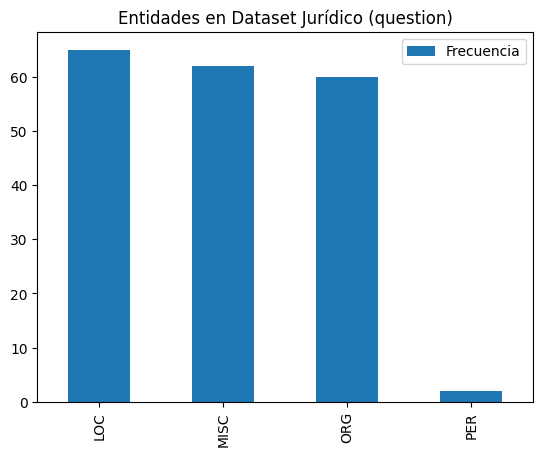

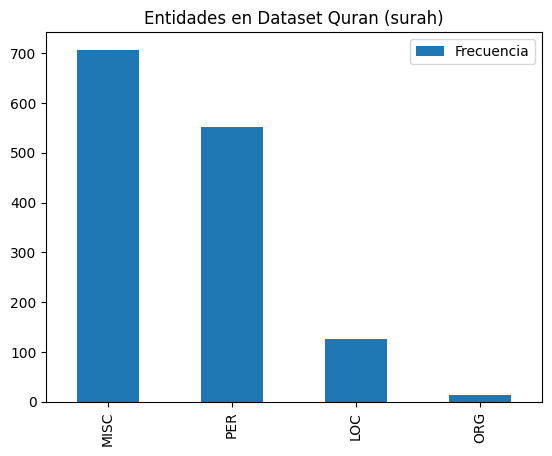

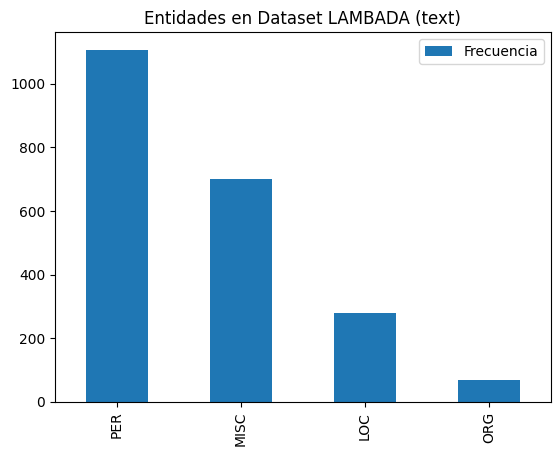

In [25]:
import pandas as pd

def plot_entity_counts(counts, title):
    df = pd.DataFrame.from_dict(counts, orient="index", columns=["Frecuencia"])
    df.sort_values(by="Frecuencia", ascending=False).plot(kind="bar", title=title)

plot_entity_counts(counts_juridico, "Entidades en Dataset Jurídico (question)")
plot_entity_counts(counts_quran, "Entidades en Dataset Quran (surah)")
plot_entity_counts(counts_lambada, "Entidades en Dataset LAMBADA (text)")

### Análisis de Reconocimiento de entidades (NER)

Los resultados muestran diferencias interesantes:

* En el **dataset jurídico**, las entidades más comunes fueron `LOC`, `ORG` y `MISC`, mientras que `PER` (personas) fue casi inexistente. Esto tiene sentido ya que el lenguaje jurídico se enfoca en lugares, instituciones y términos legales más que en individuos.

* En el **dataset religioso (Quran)**, predominan `MISC` y `PER`, lo cual es coherente con la naturaleza del texto, que menciona con frecuencia conceptos abstractos y figuras históricas o religiosas.

* En el **dataset narrativo (LAMBADA)**, `PER` fue la entidad más frecuente, seguida de `MISC` y `LOC`. Esto refleja que los textos narrativos tienden a enfocarse en personajes, lugares y elementos variados del entorno.

En general, el modelo mostró un desempeño razonable para identificar entidades relevantes, aunque en textos complejos o muy específicos (como el jurídico o el religioso) pueden aparecer confusiones o etiquetas genéricas (`MISC`) debido a la ambigüedad o falta de contexto entrenado.
